# Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd

Dataset Link: https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV

In [3]:
#loading the data to a pandas Dataframe
transaction_data = pd.read_csv('/home/lucy/Downloads/Fraud.csv')

In [4]:
transaction_data.shape

(6362620, 11)

In [5]:
#first five rows of the data
transaction_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
#last ten rows of the data
transaction_data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Analyzing the data

In [7]:
# dataset informations
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Checking for null values
transaction_data.isnull().values.any()

False

So there are no null values.

In [9]:
# distribution of legit transactions & fraudulent transactions

transaction_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

We can clearly see that the dataset is highly unbalanced.
where '0' represents Legit transactions and
      '1' represents Fraudulent transactions.
      
For better undestanding see the diagram below:

In [10]:
# For a clear counting of dataset

legit = len(transaction_data[transaction_data.isFraud == 0])
fraud = len(transaction_data[transaction_data.isFraud == 1])
legit_transaction_percentage = (legit / (fraud + legit)) * 100
fraud_transaction_percentage = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_transaction_percentage))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_transaction_percentage))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


# DATA VISUALISATION

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

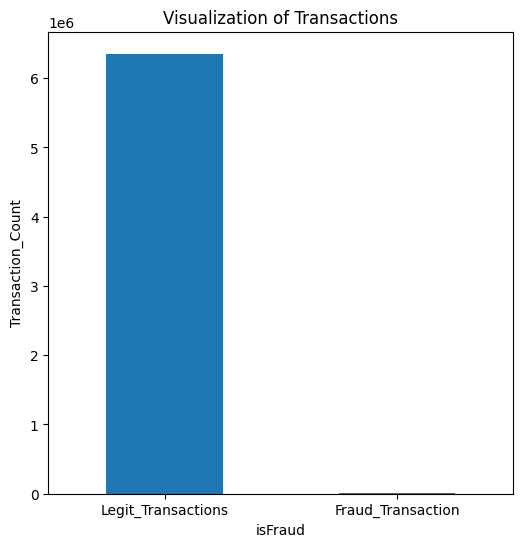

In [12]:
plt.figure(figsize=(6,6))
labels = ["Legit_Transactions", "Fraud_Transaction"]
count_classes = transaction_data.value_counts(transaction_data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Transactions")
plt.ylabel("Transaction_Count")
plt.xticks(range(2), labels)
plt.show()

# Problem Solving

In [13]:
#creating a copy of original dataset to train and test the models

new_dataset=transaction_data.copy()
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
# Checking if there are any attributes with dtype: object

new_List = new_dataset.select_dtypes(include = "object").columns
print ("Variables with datatype - 'object' are:")
print (new_List)

Variables with datatype - 'object' are:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')


We need to Label Encode them as this three Attributes are 'object'

In [21]:
#Label Encoding for object to numeric conversion

label_encode = LabelEncoder()

for i in new_List:
    new_dataset[i] = label_encode.fit_transform(new_dataset[i].astype(str))

print (new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


The three "object" has successfully converted into integer

# Multicolinearity Checking

In [22]:
#importing related Dependencies
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
def calc_vif(transaction_data):

    # Calculating Variance Inflation Factor
    vif = pd.DataFrame()
    vif["Variables"] = transaction_data.columns
    vif["VIF"] = [variance_inflation_factor(transaction_data.values, i) for i in range(transaction_data.shape[1])]

    return(vif)

calc_vif(new_dataset)

,Variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


There are three highly correlated variables which are: 

nameOrig-nameDest,
oldbalanceOrg-newbalanceOrig and
oldbalanceDest-newbalanceDest

After combinning these pairs,deopping the individual ones

In [24]:
#concatinating columns

new_dataset['balance_orig'] = new_dataset.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_dataset['balance_dest'] = new_dataset.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_dataset['name'] = new_dataset.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#dropping columns
new_dataset = new_dataset.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

calc_vif(new_dataset)

,Variables,VIF
0,step,2.710678
1,type,2.863989
2,amount,3.890535
3,isFraud,1.189937
4,isFlaggedFraud,1.002563
5,balance_orig,1.332185
6,balance_dest,3.790322
7,name,3.472358


Now using the VIF values and correlation heatmap of previous dataset 
"transaction_data" and newly created dataset "new_dataset" ,we can 
select the variables to include into the model.

/tmp/ipykernel_4913/2503696863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=transaction_data.corr()


<Axes: >

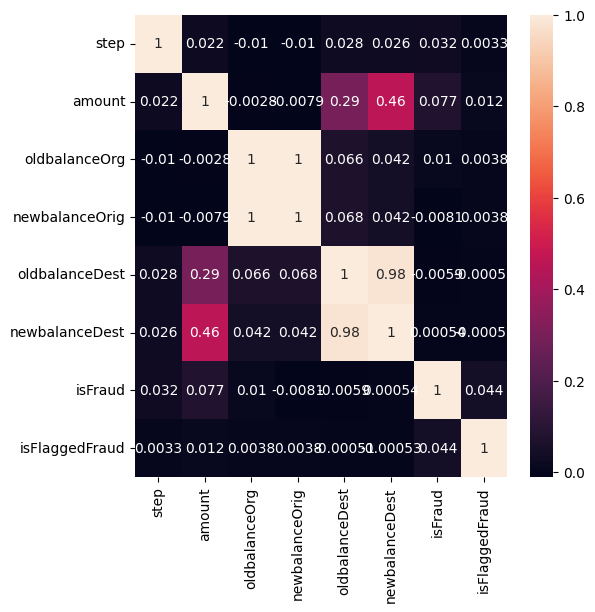

In [25]:
#heatmap of transaction_data
corr=transaction_data.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

<Axes: >

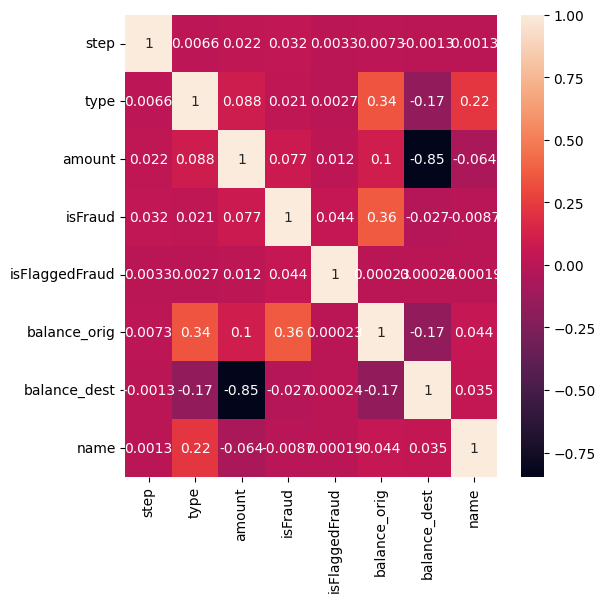

In [26]:
#heatmap of new_dataset
corr=new_dataset.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

# Model Building

In [35]:
#importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
X = new_dataset.drop(columns='isFraud', axis=1)
Y = new_dataset['isFraud']

Splitting Features & Target

In [29]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 7)
Shape of X_test:  (1908786, 7)


# Model Training

In [30]:
# Decision tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [31]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [32]:
# Logistic Regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_pred_lr = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, Y_test) * 100

# Evaluation

Scores of Classifiers

In [33]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)
print("Logistic Regression Score: ", logistic_regression_score)

Decision Tree Score:  99.94121918329242
Random Forest Score:  99.96416570532264
Logistic Regression Score:  99.87898067148438


Classification Report

In [36]:
# Decision Tree

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report for Decision Tree:")
print(classification_report_dt)

# Random Forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report for Random Forest:")
print(classification_report_rf)

# Logistic Regression

classification_report_lr = classification_report(Y_test, Y_pred_lr)
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.77      0.77      0.77      2435

    accuracy                           1.00   1908786
   macro avg       0.88      0.88      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.74      0.84      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.54      0.36      0.43      2435

    accuracy                           1.00   1908786

# Conclusion

We can see the Accuracy of Decision Tree and Random Forest is almost
same. Precision is a crucial factor to predict correctly. The Precision
and  f1-score for Random Forest is way better than other two. So,
Random Forest is the best option. There is no way of taking Logistic 
regression.

> With the help of Correlation Heatmap, we have selected the variables.

> Source of the transaction request,legitimacy of the requesting 
organisation/individual could be the key factors to predict
fraudulent customer.

> verified software, usage of VPN, keeping contact with bank, keep updated
software on mobile/pc, using secure websites can prevent this kind of 
transactions

Thank You.